# Mashion Mnist dataset 

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


import warnings
warnings.filterwarnings('ignore')

## Constants

In [2]:
LABEL_DICT = {
    "0" : "T-shirt/top",
    "1" : "Trouser",
    "2" : "Pullover",
    "3" : "Dress",
    "4" : "Coat",
    "5" : "Sandal",
    "6" : "Shirt",
    "7" : "Sneaker",
    "8" : "Bag",
    "9" : "Ankle boot",
}
TEST_SIZE = 0.2
VAL_SIZE = 0.2
RANDOM_STATE = 42
ROTATION_RANGE = 10
WIDTH_SHIFT_RANGE = 0.2
HEIGHT_SHIFT_RANGE = 0.2
ZOOM_RANGE = 0.2
HORIZONTAL_FLIP = True
BATCH_SIZE = 1024
OPTIMIZER = "adam"
LOSS = "sparse_categorical_crossentropy"
METRICS = ["accuracy"]
EPOCHS = 100
VERBOSE = 1

## Load data

In [3]:
train_df = pd.read_csv('data/fashion-mnist_train.csv', sep=',')
test_df = pd.read_csv('data/fashion-mnist_test.csv', sep = ',')

## Describe data

In [4]:
print(train_df.shape)
train_df.head()

(60000, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
print(test_df.shape)
test_df.head()

(10000, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Preprocessing

### Concat dataset

In [6]:
total_df = pd.concat([train_df, test_df], axis=0)
print(total_df.shape)

(70000, 785)


### Separate images and labels

In [7]:
X_df = total_df.drop('label', axis=1)
y_df = total_df['label']

### Convert data in nupmy array

In [8]:
X_array = np.array(X_df, dtype = 'float32')
y_array = np.array(y_df, dtype = 'float32')

print(X_array.shape)
print(y_array.shape)

(70000, 784)
(70000,)


### Data split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_array, y_array, test_size=TEST_SIZE, random_state=RANDOM_STATE)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=VAL_SIZE, random_state=RANDOM_STATE)

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)

## Data augmentation

In [10]:
""" X_train_augmented = ImageDataGenerator(
        rotation_range=ROTATION_RANGE,
        width_shift_range=WIDTH_SHIFT_RANGE,
        height_shift_range=HEIGHT_SHIFT_RANGE,
        zoom_range=ZOOM_RANGE,
        horizontal_flip=HORIZONTAL_FLIP,
).flow(X_train, y_train, batch_size=BATCH_SIZE) """
X_train_augmented = ImageDataGenerator(
        rescale=1./255,
).flow(X_train, y_train, batch_size=BATCH_SIZE)

X_val = X_val / 255
X_test = X_test / 255

# Models

## Model_1

### Create model

In [11]:
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.AveragePooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.AveragePooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_1.compile(optimizer=OPTIMIZER, loss=LOSS, metrics=METRICS)

In [12]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 13, 13, 32)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 5, 5, 64)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       409,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 437,226 (1.67 MB)

 Trainable params: 437,226 (1.67 MB)

 Non-trainable params: 0 (0.00 B)

### Fit

In [13]:
history_1 = model_1.fit(X_train_augmented, epochs=EPOCHS, validation_data=(X_val, y_val))

Epoch 1/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 10s 167ms/step - accuracy: 0.4356 - loss: 1.6935 - val_accuracy: 0.7279 - val_loss: 0.6965
Epoch 2/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 8s 181ms/step - accuracy: 0.7211 - loss: 0.7503 - val_accuracy: 0.7757 - val_loss: 0.5716
Epoch 3/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 8s 168ms/step - accuracy: 0.7689 - loss: 0.6167 - val_accuracy: 0.8100 - val_loss: 0.4987
Epoch 4/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 7s 166ms/step - accuracy: 0.7979 - loss: 0.5448 - val_accuracy: 0.8314 - val_loss: 0.4597
Epoch 5/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 7s 161ms/step - accuracy: 0.8177 - loss: 0.4993 - val_accuracy: 0.8388 - val_loss: 0.4314
Epoch 6/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 7s 165ms/step - accuracy: 0.8302 - loss: 0.4579 - val_accuracy: 0.8535 - val_loss: 0.3991
Epoch 7/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 8s 170ms/step - accuracy: 0.8426 - loss: 0.4306 - val_accuracy: 0.8634 - val_loss: 0.3789
Epoch 8/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 7s 150ms/step - accuracy: 0.8533 - loss: 0.4061 - val_acc

## Results

### Learning curve

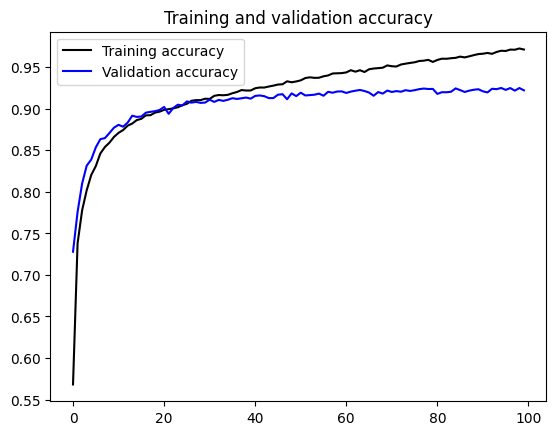

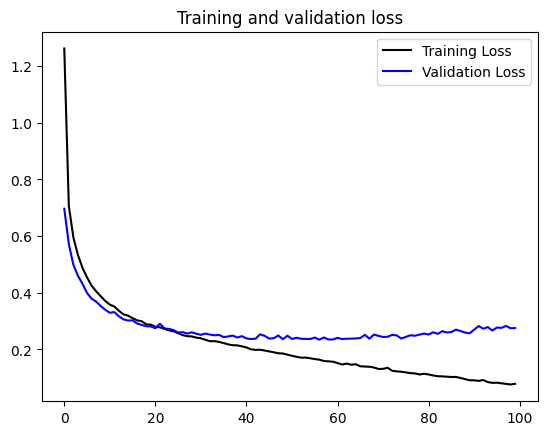

In [14]:
acc = history_1.history['accuracy']
val_acc = history_1.history['val_accuracy']
loss = history_1.history['loss']
val_loss = history_1.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, color='black', label='Training accuracy')
plt.plot(epochs, val_acc, color='b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, color='black', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Confusion Matrix

438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
Accuracy: 0.921


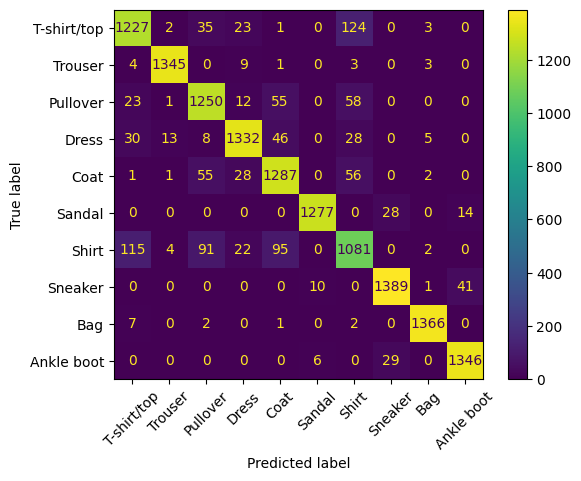

In [15]:
y_pred_proba_1 = model_1.predict(X_test)
y_pred_1 = np.argmax(y_pred_proba_1, axis=1)
accuracy = accuracy_score(y_test, y_pred_1)

cm_1 = confusion_matrix(y_test, y_pred_1)
disp_1 = ConfusionMatrixDisplay(confusion_matrix=cm_1, display_labels=LABEL_DICT.values())
ax_1 = disp_1.plot().ax_
plt.xticks(rotation=45)

print(f"Accuracy: {accuracy:.3f}")
plt.show()

## Model_2

In [16]:
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_2.compile(optimizer=tf.keras.optimizers.Adam(), loss=LOSS, metrics=METRICS)

In [17]:
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │       409,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 437,226 (1.67 MB)

 Trainable params: 437,226 (1.67 MB)

 Non-trainable params: 0 (0.00 B)

### Fit

In [18]:
history_2 = model_2.fit(X_train_augmented, epochs=EPOCHS, validation_data=(X_val, y_val))

Epoch 1/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 8s 140ms/step - accuracy: 0.4391 - loss: 1.6063 - val_accuracy: 0.7530 - val_loss: 0.6357
Epoch 2/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 134ms/step - accuracy: 0.7460 - loss: 0.6697 - val_accuracy: 0.8025 - val_loss: 0.5117
Epoch 3/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 125ms/step - accuracy: 0.7951 - loss: 0.5507 - val_accuracy: 0.8371 - val_loss: 0.4447
Epoch 4/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 128ms/step - accuracy: 0.8251 - loss: 0.4816 - val_accuracy: 0.8576 - val_loss: 0.3907
Epoch 5/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 142ms/step - accuracy: 0.8437 - loss: 0.4294 - val_accuracy: 0.8680 - val_loss: 0.3704
Epoch 6/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 7s 145ms/step - accuracy: 0.8598 - loss: 0.3961 - val_accuracy: 0.8753 - val_loss: 0.3429
Epoch 7/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - accuracy: 0.8639 - loss: 0.3738 - val_accuracy: 0.8768 - val_loss: 0.3354
Epoch 8/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 127ms/step - accuracy: 0.8740 - loss: 0.3504 - val_accu

## Results

### Learning curve

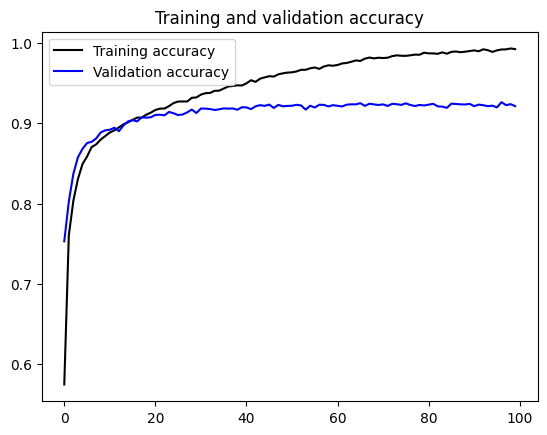

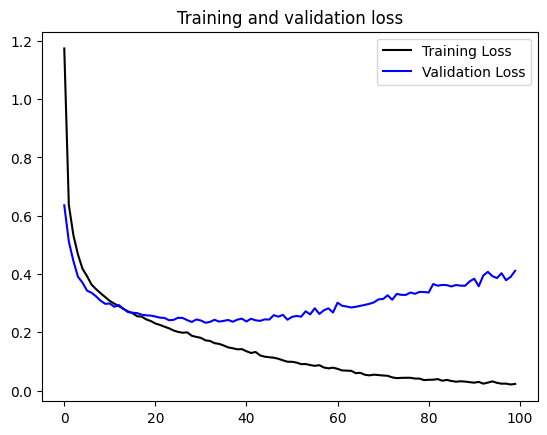

In [19]:
acc = history_2.history['accuracy']
val_acc = history_2.history['val_accuracy']
loss = history_2.history['loss']
val_loss = history_2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, color='black', label='Training accuracy')
plt.plot(epochs, val_acc, color='b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, color='black', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Confusion Matrix

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Accuracy: 0.917


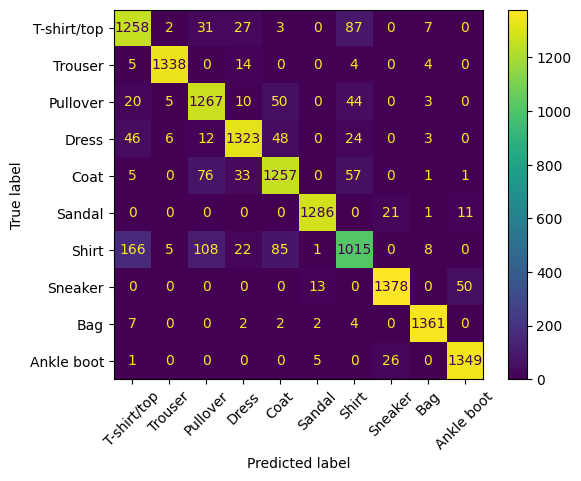

In [20]:
y_pred_proba_2 = model_2.predict(X_test)
y_pred_2 = np.argmax(y_pred_proba_2, axis=1)
accuracy_2 = accuracy_score(y_test, y_pred_2)

cm_2 = confusion_matrix(y_test, y_pred_2)
disp_2 = ConfusionMatrixDisplay(confusion_matrix=cm_2, display_labels=LABEL_DICT.values())
ax_2 = disp_2.plot().ax_
plt.xticks(rotation=45)

print(f"Accuracy: {accuracy_2:.3f}")
plt.show()

### Model_3 

In [21]:
model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.AveragePooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_3.compile(optimizer=OPTIMIZER, loss=LOSS, metrics=METRICS)

In [22]:
model_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_2             │ (None, 13, 13, 16)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 64)     │         9,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1024)           │     1,639,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,659,114 (6.33 MB)

 Trainable params: 1,659,114 (6.33 MB)

 Non-trainable params: 0 (0.00 B)

### Fit

In [23]:
history_3 = model_3.fit(X_train_augmented, epochs=EPOCHS, validation_data=(X_val, y_val))

Epoch 1/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 120ms/step - accuracy: 0.5874 - loss: 1.3452 - val_accuracy: 0.7761 - val_loss: 0.5883
Epoch 2/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 115ms/step - accuracy: 0.8032 - loss: 0.5421 - val_accuracy: 0.8192 - val_loss: 0.4844
Epoch 3/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step - accuracy: 0.8327 - loss: 0.4650 - val_accuracy: 0.8473 - val_loss: 0.4206
Epoch 4/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step - accuracy: 0.8553 - loss: 0.4040 - val_accuracy: 0.8579 - val_loss: 0.3884
Epoch 5/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - accuracy: 0.8672 - loss: 0.3719 - val_accuracy: 0.8593 - val_loss: 0.3789
Epoch 6/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 118ms/step - accuracy: 0.8729 - loss: 0.3501 - val_accuracy: 0.8752 - val_loss: 0.3472
Epoch 7/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 115ms/step - accuracy: 0.8816 - loss: 0.3292 - val_accuracy: 0.8781 - val_loss: 0.3359
Epoch 8/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 115ms/step - accuracy: 0.8848 - loss: 0.3213 - val_accu

## Results

### Learning curve

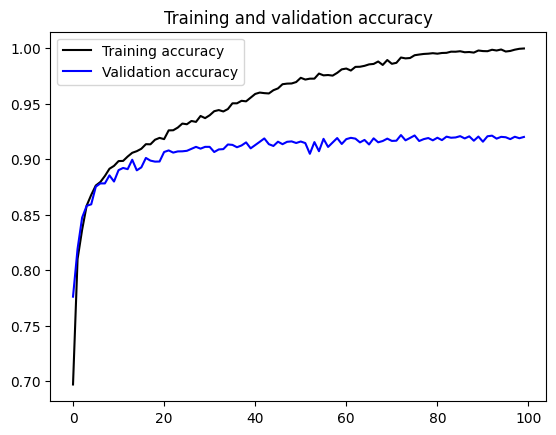

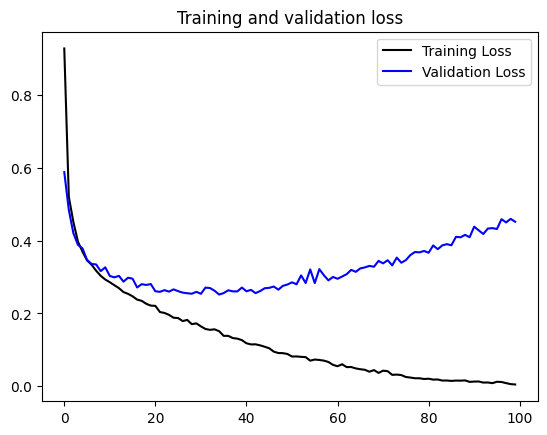

In [24]:
acc = history_3.history['accuracy']
val_acc = history_3.history['val_accuracy']
loss = history_3.history['loss']
val_loss = history_3.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, color='black', label='Training accuracy')
plt.plot(epochs, val_acc, color='b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, color='black', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Confusion Matrix

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Accuracy: 0.915


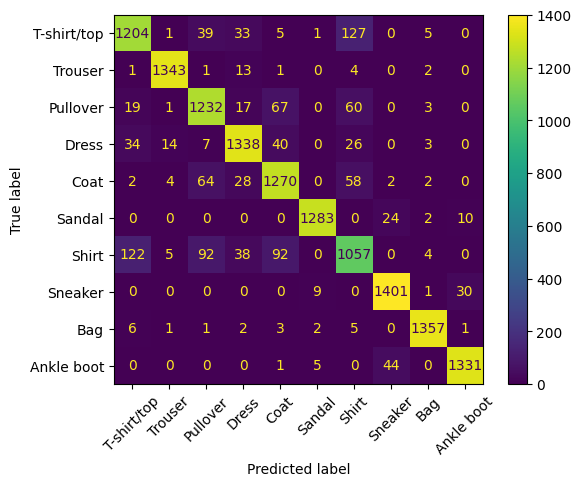

In [25]:
y_pred_proba_3 = model_3.predict(X_test)
y_pred_3 = np.argmax(y_pred_proba_3, axis=1)
accuracy_3 = accuracy_score(y_test, y_pred_3)

cm_3 = confusion_matrix(y_test, y_pred_3)
disp_3 = ConfusionMatrixDisplay(confusion_matrix=cm_3, display_labels=LABEL_DICT.values())
ax_3 = disp_3.plot().ax_
plt.xticks(rotation=45)

print(f"Accuracy: {accuracy_3:.3f}")
plt.show()

## Confusion matrix together

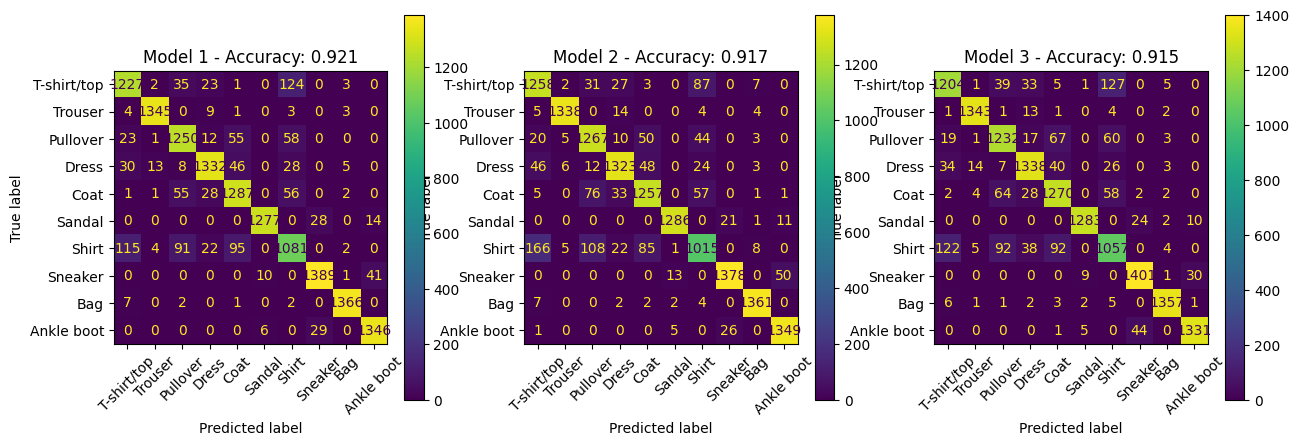

In [26]:
# print all confusion matrices
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

disp_1.plot(ax=axs[0])
axs[0].set_title(f'Model 1 - Accuracy: {accuracy:.3f}')
axs[0].set_xticklabels(LABEL_DICT.values(), rotation=45)

disp_2.plot(ax=axs[1])
axs[1].set_title(f'Model 2 - Accuracy: {accuracy_2:.3f}')
axs[1].set_xticklabels(LABEL_DICT.values(), rotation=45)

disp_3.plot(ax=axs[2])
axs[2].set_title(f'Model 3 - Accuracy: {accuracy_3:.3f}')
axs[2].set_xticklabels(LABEL_DICT.values(), rotation=45)

plt.show()

## Vote system

### Majority

In [27]:
# vote classifier with majority rule
y_pred_final_maj = np.array([y_pred_1, y_pred_2, y_pred_3]).T
y_pred_final_maj = [np.argmax(np.bincount(y_pred_final_maj[i])) for i in range(len(y_pred_final_maj))]
accuracy_final_maj = accuracy_score(y_test, y_pred_final_maj)
accuracy_final_maj

0.9254285714285714

Accuracy: 0.925


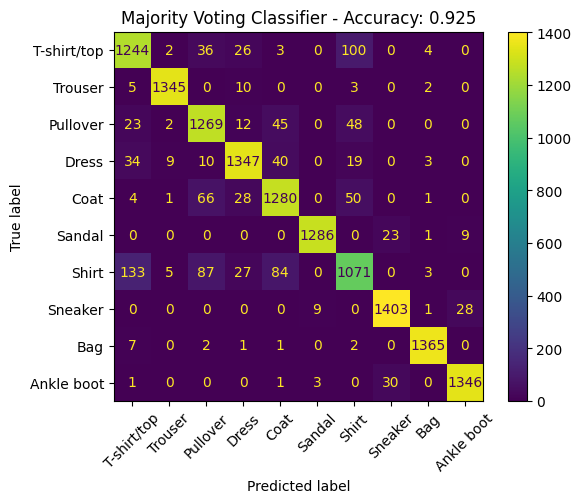

In [28]:
cm_final_maj = confusion_matrix(y_test, y_pred_final_maj)
disp_final_maj = ConfusionMatrixDisplay(confusion_matrix=cm_final_maj, display_labels=LABEL_DICT.values())
ax_final_maj = disp_final_maj.plot().ax_
plt.xticks(rotation=45)
plt.title(f"Majority Voting Classifier - Accuracy: {accuracy_final_maj:.3f}")
print(f"Accuracy: {accuracy_final_maj:.3f}")
plt.show()

### Proba system

In [29]:
# vote classifier with weighted rule
y_pred_final_wei = y_pred_proba_1 + y_pred_proba_2 + y_pred_proba_3
y_pred_final_wei = np.argmax(y_pred_final_wei, axis=1)
accuracy_final_wei = accuracy_score(y_test, y_pred_final_wei)

Accuracy: 0.9279285714285714


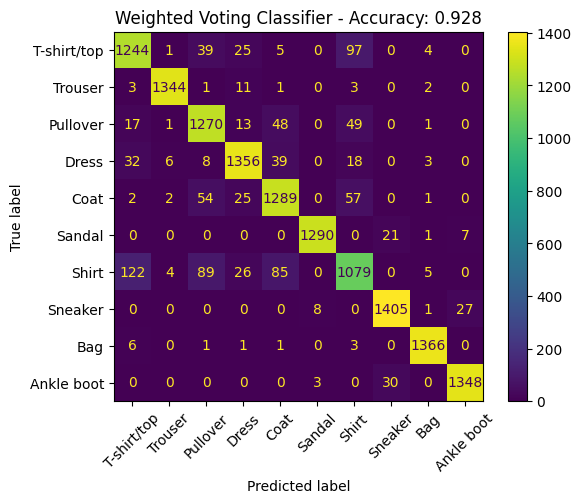

In [31]:
cm_final_wei = confusion_matrix(y_test, y_pred_final_wei)
disp_final_wei = ConfusionMatrixDisplay(confusion_matrix=cm_final_wei, display_labels=LABEL_DICT.values())
ax_final_wei = disp_final_wei.plot().ax_
plt.xticks(rotation=45)
plt.title(f"Weighted Voting Classifier - Accuracy: {accuracy_final_wei:.3f}")
print(f"Accuracy: {accuracy_final_wei}")
plt.show()